In [5]:
%reset
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt

%matplotlib inline
st = time.time()

# data is assumed to be [V_vec I_vec C_vec]
# all vec are of the same size

# change the file name if using a different set
data = np.loadtxt(os.path.expanduser('~/quantum-ml/data/var_K_I_V_1000_3_10meV.txt'))

# data randomly permuted to avoid bias in the way the data is generated.
data = np.random.permutation(data)
n_tot = data.shape[0]
# train_total_factor : size of training set in comparison to the total
# 0.8 sound good
train_total_factor = 0.8
n_train = int(train_total_factor*n_tot)
n_test = n_tot - n_train

# input parameters
n_inp = int(data.shape[1]/3)
n_out = int(data.shape[1]/3)
print("Number of inputs:", n_inp)
print("Number of outputs:", n_out)

max_charge_state = int(np.max(data[:,n_inp:]))
num_classes = max_charge_state + 1
print("Number of classes: ",num_classes)

x_train_data = data[:n_train,n_inp:2*n_inp].reshape((n_train,n_inp))
# convert the y_data into the form of the output of a classifier
y_train_data = np.zeros((n_train,n_out,num_classes))
for i in range(n_train):
    charge_state_vec = data[i,2*n_inp:].astype(int)
    for j in range(len(charge_state_vec)):
        y_train_data[i,j,charge_state_vec[j]] = 1.0
x_test_data = data[n_train:,n_inp:2*n_inp].reshape((n_test,n_inp))
y_test_data = np.zeros((n_test,n_out,num_classes))
for i in range(n_train,n_tot):
    charge_state_vec = data[i,2*n_inp:].astype(int)
    for j in range(len(charge_state_vec)):
        y_test_data[i - n_train,j,charge_state_vec[j]] = 1.0

print("Total, Training, Test")
print(n_tot, n_train, n_test)

x = tf.placeholder(tf.float32, [None, n_inp])

W = tf.Variable(tf.zeros([n_inp,n_out,num_classes]))
b = tf.Variable(tf.zeros([n_out,num_classes]))


W_mul = tf.reshape(W,[n_inp,n_out*num_classes])
prod = tf.matmul(x, W_mul)
Wx = tf.reshape(prod,[-1,n_out,num_classes])
y = tf.nn.softmax(Wx + b)

# this node holds the expected output data
y_ = tf.placeholder(tf.float32, [None, n_out, num_classes])

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_)
cost = tf.reduce_mean(cross_entropy)

train_step = tf.train.GradientDescentOptimizer(10).minimize(cost)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

N_steps = 10000
for _ in range(N_steps):
    train_data = np.random.permutation(data[:n_train])
    x_train_data = train_data[:n_train,n_inp:2*n_inp].reshape((n_train,n_inp))
    # convert the y_data into the form of the output of a classifier
    y_train_data = np.zeros((n_train,n_out,num_classes))
    for i in range(n_train):
        charge_state_vec = train_data[i,2*n_inp:].astype(int)
        for j in range(len(charge_state_vec)):
            y_train_data[i,j,charge_state_vec[j]] = 1.0
    batch_xs, batch_ys = x_train_data,y_train_data
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if (_ % (N_steps/10) == 0):
        print(_)

correct_prediction = tf.equal(tf.argmax(y,-1), tf.argmax(y_,-1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: x_test_data, y_: y_test_data}))
print("Completed in ",time.time()-st,"seconds.")

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Number of inputs: 100
Number of outputs: 100
Number of classes:  10
Total, Training, Test
1000 800 200
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0.5444
Completed in  2638.023681640625 seconds.


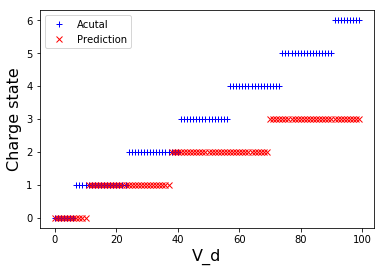

In [7]:
z = tf.argmax(y,-1)
z_corr = tf.argmax(y_,-1)
output_model = sess.run([z,z_corr],{x:x_test_data,y_: y_test_data})

i = 9
plt.plot(output_model[1][i],'b+')
plt.plot(output_model[0][i],'rx')
plt.legend(['Acutal','Prediction'])
plt.xlabel('V_d',fontsize=16)
plt.ylabel('Charge state',fontsize=16)

In [ ]:
print(x_train_data.shape)

In [ ]:
import tensorflow as tf